# Imports and set up

In [1]:
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns

from eralchemy2 import render_er
from IPython.display import Image

from plot import despine_all, kde_boxen_qq
from prepare import html_to_plain_text

from wordcloud import WordCloud, STOPWORDS

In [2]:
SQLITE_FILE_PATH = 'data.sqlite'

In [3]:
con = sqlite3.connect(SQLITE_FILE_PATH)

# Explore the data

In [4]:
# Draw ER diagram from the database
render_er("sqlite:///data.sqlite", "erd_from_sqlite.png")

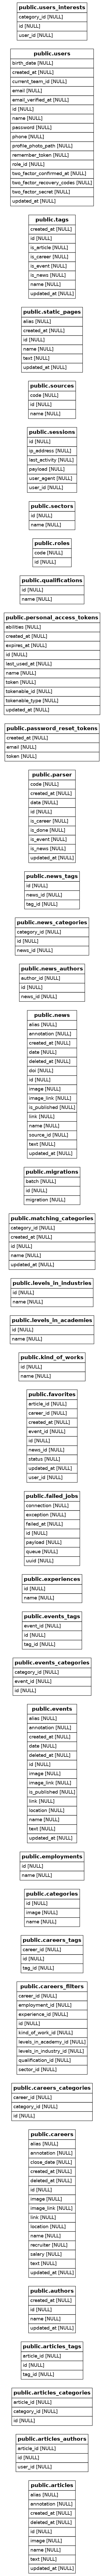

In [5]:
# Display ER in the notebook
Image(filename='erd_from_sqlite.png')

In [6]:
# get the schema
schema_df = pd.read_sql_query("SELECT * FROM sqlite_master", con)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,public.articles_tags,public.articles_tags,2,"CREATE TABLE `public.articles_tags` (`id`, `ar..."
1,table,public.news_authors,public.news_authors,3,"CREATE TABLE `public.news_authors` (`id`, `new..."
2,table,public.favorites,public.favorites,16,"CREATE TABLE `public.favorites` (`id`, `status..."
3,table,public.categories,public.categories,17,"CREATE TABLE `public.categories` (`id`, `name`..."
4,table,public.careers_tags,public.careers_tags,18,"CREATE TABLE `public.careers_tags` (`id`, `car..."
5,table,public.failed_jobs,public.failed_jobs,19,"CREATE TABLE `public.failed_jobs` (`id`, `uuid..."
6,table,public.articles_categories,public.articles_categories,20,CREATE TABLE `public.articles_categories` (`id...
7,table,public.experiences,public.experiences,21,"CREATE TABLE `public.experiences` (`id`, `name`)"
8,table,public.events,public.events,22,"CREATE TABLE `public.events` (`id`, `name`, `a..."
9,table,public.careers_filters,public.careers_filters,36,"CREATE TABLE `public.careers_filters` (`id`, `..."


In [7]:
careers_with_categories_query = """
SELECT DISTINCT careers.*, categories.name AS category FROM 'public.careers' careers
FULL OUTER JOIN 'public.careers_categories' relations_table
ON careers.id = relations_table.career_id
JOIN 'public.categories' categories
ON relations_table.category_id = categories.id
"""

df = pd.read_sql_query(careers_with_categories_query, con)

df

,id,name,alias,annotation,text,image,deleted_at,created_at,updated_at,close_date,salary,location,recruiter,link,image_link,category
0,1,Westlake University: A Quick Career Path from ...,moJhlLtFIBJmMV3k,"China, Hangzhou | Westlake University",<p>The Westlake Fellows Program is seeking out...,,,2023-05-29 09:59:41,2023-05-29 09:59:41,2023-06-27 22:59:00,,"China, Hangzhou",Westlake University,https://www.nature.com/naturecareers/job/12798...,https://www.nature.com/naturecareers/getasset/...,Genetics
1,2,Harvard Medical School Department of Neurobiol...,TeOAJaLFHgp095UZ,"United States, Boston | Harvard Medical School...",<p>The labs of Sandeep Robert Datta and Michae...,,,2023-05-29 09:59:42,2023-05-29 09:59:42,2023-07-25 22:59:00,,"United States, Boston",Harvard Medical School Department of Neurobiology,https://www.nature.com/naturecareers/job/12799...,https://www.nature.com/naturecareers/getasset/...,Neuroscience
2,3,Westlake University: Faculty Positions in West...,qWUPcA26LZh6Az6q,"China, Hangzhou | Westlake University",<p><strong>ABOUT US</strong></p> <p>Founded in...,,,2023-05-29 09:59:43,2023-05-29 09:59:43,2023-11-25 23:59:00,,"China, Hangzhou",Westlake University,https://www.nature.com/naturecareers/job/12799...,https://www.nature.com/naturecareers/getasset/...,Genetics
3,3,Westlake University: Faculty Positions in West...,qWUPcA26LZh6Az6q,"China, Hangzhou | Westlake University",<p><strong>ABOUT US</strong></p> <p>Founded in...,,,2023-05-29 09:59:43,2023-05-29 09:59:43,2023-11-25 23:59:00,,"China, Hangzhou",Westlake University,https://www.nature.com/naturecareers/job/12799...,https://www.nature.com/naturecareers/getasset/...,Biochemistry
4,4,"Institute of Zoology, Chinese Academy of Scien...",C5ODhm6WxtwJgjIP,"China, Beijing | Institute of Zoology, Chinese...","<p>The Institute of Zoology (IOZ), Chinese Aca...",,,2023-05-29 09:59:44,2023-05-29 09:59:44,2023-06-23 22:59:00,,"China, Beijing","Institute of Zoology, Chinese Academy of Scien...",https://www.nature.com/naturecareers/job/78136...,https://www.nature.com/naturecareers/getasset/...,Zoology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,61,Human Technopole: Postdoc - Giustacchini Group,jA9bKt51dOirRJHC,"Italy, Milan | Human Technopole",<p><strong>APPLICATION CLOSING DATE:&#160; 30t...,,,2023-06-08 06:10:01,2023-06-08 06:10:01,2023-08-04 22:59:00,,"Italy, Milan",Human Technopole,https://www.nature.com/naturecareers/job/12800...,https://www.nature.com/naturecareers/getasset/...,Genetics
101,61,Human Technopole: Postdoc - Giustacchini Group,jA9bKt51dOirRJHC,"Italy, Milan | Human Technopole",<p><strong>APPLICATION CLOSING DATE:&#160; 30t...,,,2023-06-08 06:10:01,2023-06-08 06:10:01,2023-08-04 22:59:00,,"Italy, Milan",Human Technopole,https://www.nature.com/naturecareers/job/12800...,https://www.nature.com/naturecareers/getasset/...,Computational biology and bioinformatics
102,62,Center for Life Sciences: International Fellow...,qCSVSlYavmMo2U14,"China, Beijing | Center for Life Sciences",<p><strong>The joint Center for Life Sciences ...,,,2023-06-13 08:49:24,2023-06-13 08:49:24,2023-09-04 23:00:00,,"China, Beijing",Center for Life Sciences,https://www.nature.com/naturecareers/job/77899...,https://www.nature.com/naturecareers/getasset/...,Genetics
103,63,State Key Laboratory of Primate Biomedical Res...,eVsM3Q4uyzvZf4My,"China, Kunming | State Key Laboratory of Prima...",<p><strong>Introduction to LPBR</strong></p> <...,,,2023-06-13 08:49:24,2023-06-13 08:49:24,2023-08-16 22:59:00,,"China, Kunming",State Key Laboratory of Primate Biomedical Res...,https://www.nature.com/naturecareers/job/78097...,https://www.nature.com/naturecareers/getasset/...,Genetics


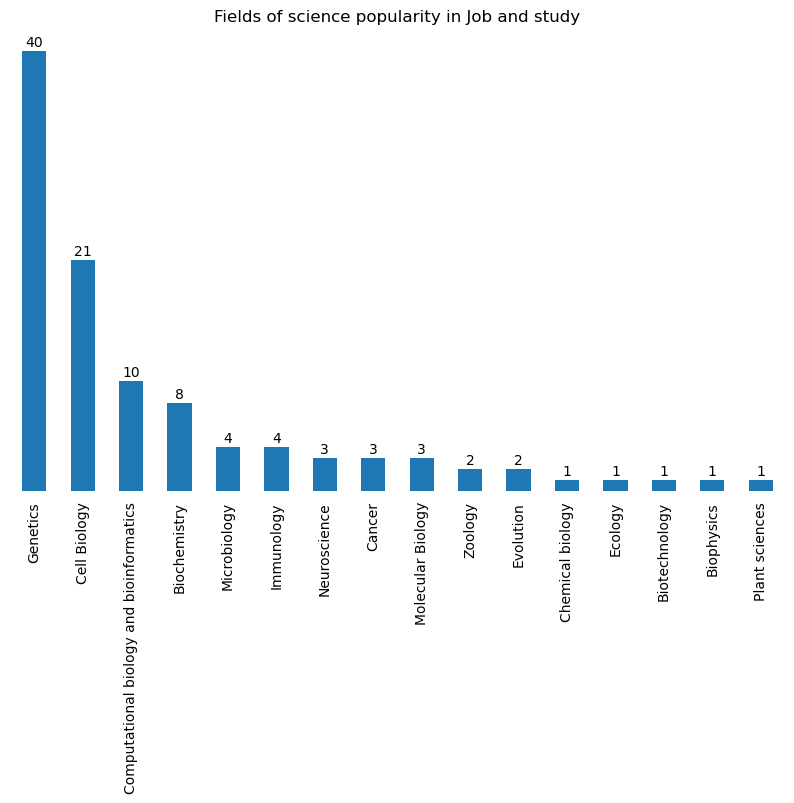

In [8]:
df['category'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.bar_label(plt.gca().containers[0], padding=2)
plt.xticks(rotation=90)

plt.title('Fields of science popularity in Job and study')

despine_all()

plt.show()

# Prepare the data

### Convert category to dummy variables

In [9]:
# Create dummy column for each category
df = pd.concat([df, pd.get_dummies(df['category'])], axis=1).drop_duplicates(subset=['id']).drop(columns=['category'])
df

,id,name,alias,annotation,text,image,deleted_at,created_at,updated_at,close_date,...,Computational biology and bioinformatics,Ecology,Evolution,Genetics,Immunology,Microbiology,Molecular Biology,Neuroscience,Plant sciences,Zoology
0,1,Westlake University: A Quick Career Path from ...,moJhlLtFIBJmMV3k,"China, Hangzhou | Westlake University",<p>The Westlake Fellows Program is seeking out...,,,2023-05-29 09:59:41,2023-05-29 09:59:41,2023-06-27 22:59:00,...,0,0,0,1,0,0,0,0,0,0
1,2,Harvard Medical School Department of Neurobiol...,TeOAJaLFHgp095UZ,"United States, Boston | Harvard Medical School...",<p>The labs of Sandeep Robert Datta and Michae...,,,2023-05-29 09:59:42,2023-05-29 09:59:42,2023-07-25 22:59:00,...,0,0,0,0,0,0,0,1,0,0
2,3,Westlake University: Faculty Positions in West...,qWUPcA26LZh6Az6q,"China, Hangzhou | Westlake University",<p><strong>ABOUT US</strong></p> <p>Founded in...,,,2023-05-29 09:59:43,2023-05-29 09:59:43,2023-11-25 23:59:00,...,0,0,0,1,0,0,0,0,0,0
4,4,"Institute of Zoology, Chinese Academy of Scien...",C5ODhm6WxtwJgjIP,"China, Beijing | Institute of Zoology, Chinese...","<p>The Institute of Zoology (IOZ), Chinese Aca...",,,2023-05-29 09:59:44,2023-05-29 09:59:44,2023-06-23 22:59:00,...,0,0,0,0,0,0,0,0,0,1
6,5,"Institute of Zoology, Chinese Academy of Scien...",PODcunif4YmgTuAW,"China, Beijing | Institute of Zoology, Chinese...","<p>The <strong>Institute of Zoology, Chinese A...",,,2023-05-29 09:59:45,2023-05-29 09:59:45,2023-06-23 22:59:00,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,59,NSF Center for Genetically Encoded Materials: ...,M579sIa45RsrSQxf,"United States, UC Berkeley | NSF Center for Ge...",<p>The NSF Center for Genetically Encoded Mate...,,,2023-06-08 06:09:58,2023-06-08 06:09:58,2023-08-06 22:59:00,...,0,0,0,0,0,1,0,0,0,0
98,60,Human Technopole: Technician/Senior Technician...,AbmPQxm9qoYVvNU7,"Italy, Milan | Human Technopole",<p><strong>APPLICATION CLOSING DATE:&#160; 30t...,,,2023-06-08 06:10:00,2023-06-08 06:10:00,2023-06-30 22:59:00,...,0,0,0,1,0,0,0,0,0,0
100,61,Human Technopole: Postdoc - Giustacchini Group,jA9bKt51dOirRJHC,"Italy, Milan | Human Technopole",<p><strong>APPLICATION CLOSING DATE:&#160; 30t...,,,2023-06-08 06:10:01,2023-06-08 06:10:01,2023-08-04 22:59:00,...,0,0,0,1,0,0,0,0,0,0
102,62,Center for Life Sciences: International Fellow...,qCSVSlYavmMo2U14,"China, Beijing | Center for Life Sciences",<p><strong>The joint Center for Life Sciences ...,,,2023-06-13 08:49:24,2023-06-13 08:49:24,2023-09-04 23:00:00,...,0,0,0,1,0,0,0,0,0,0


In [10]:
df['text'] = df['text'].apply(html_to_plain_text)
df

,id,name,alias,annotation,text,image,deleted_at,created_at,updated_at,close_date,...,Computational biology and bioinformatics,Ecology,Evolution,Genetics,Immunology,Microbiology,Molecular Biology,Neuroscience,Plant sciences,Zoology
0,1,Westlake University: A Quick Career Path from ...,moJhlLtFIBJmMV3k,"China, Hangzhou | Westlake University",The Westlake Fellows Program is seeking outsta...,,,2023-05-29 09:59:41,2023-05-29 09:59:41,2023-06-27 22:59:00,...,0,0,0,1,0,0,0,0,0,0
1,2,Harvard Medical School Department of Neurobiol...,TeOAJaLFHgp095UZ,"United States, Boston | Harvard Medical School...",The labs of Sandeep Robert Datta and Michael E...,,,2023-05-29 09:59:42,2023-05-29 09:59:42,2023-07-25 22:59:00,...,0,0,0,0,0,0,0,1,0,0
2,3,Westlake University: Faculty Positions in West...,qWUPcA26LZh6Az6q,"China, Hangzhou | Westlake University","ABOUT US Founded in 2018, Westlake University ...",,,2023-05-29 09:59:43,2023-05-29 09:59:43,2023-11-25 23:59:00,...,0,0,0,1,0,0,0,0,0,0
4,4,"Institute of Zoology, Chinese Academy of Scien...",C5ODhm6WxtwJgjIP,"China, Beijing | Institute of Zoology, Chinese...","The Institute of Zoology (IOZ), Chinese Academ...",,,2023-05-29 09:59:44,2023-05-29 09:59:44,2023-06-23 22:59:00,...,0,0,0,0,0,0,0,0,0,1
6,5,"Institute of Zoology, Chinese Academy of Scien...",PODcunif4YmgTuAW,"China, Beijing | Institute of Zoology, Chinese...","The Institute of Zoology, Chinese Academy of S...",,,2023-05-29 09:59:45,2023-05-29 09:59:45,2023-06-23 22:59:00,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,59,NSF Center for Genetically Encoded Materials: ...,M579sIa45RsrSQxf,"United States, UC Berkeley | NSF Center for Ge...",The NSF Center for Genetically Encoded Materia...,,,2023-06-08 06:09:58,2023-06-08 06:09:58,2023-08-06 22:59:00,...,0,0,0,0,0,1,0,0,0,0
98,60,Human Technopole: Technician/Senior Technician...,AbmPQxm9qoYVvNU7,"Italy, Milan | Human Technopole",APPLICATION CLOSING DATE: 30th of June 2023 We...,,,2023-06-08 06:10:00,2023-06-08 06:10:00,2023-06-30 22:59:00,...,0,0,0,1,0,0,0,0,0,0
100,61,Human Technopole: Postdoc - Giustacchini Group,jA9bKt51dOirRJHC,"Italy, Milan | Human Technopole",APPLICATION CLOSING DATE: 30th of June 2023 Hu...,,,2023-06-08 06:10:01,2023-06-08 06:10:01,2023-08-04 22:59:00,...,0,0,0,1,0,0,0,0,0,0
102,62,Center for Life Sciences: International Fellow...,qCSVSlYavmMo2U14,"China, Beijing | Center for Life Sciences",The joint Center for Life Sciences (CLS) at Ts...,,,2023-06-13 08:49:24,2023-06-13 08:49:24,2023-09-04 23:00:00,...,0,0,0,1,0,0,0,0,0,0


### Drop unnecessary columns

In [11]:
df.columns

Index(['id', 'name', 'alias', 'annotation', 'text', 'image', 'deleted_at',
       'created_at', 'updated_at', 'close_date', 'salary', 'location',
       'recruiter', 'link', 'image_link', 'Biochemistry', 'Biophysics',
       'Biotechnology', 'Cancer', 'Cell Biology', 'Chemical biology',
       'Computational biology and bioinformatics', 'Ecology', 'Evolution',
       'Genetics', 'Immunology', 'Microbiology', 'Molecular Biology',
       'Neuroscience', 'Plant sciences', 'Zoology'],
      dtype='object')

In [12]:
df.drop(columns=['alias', 'image', 'deleted_at', 'updated_at', 'image_link'], inplace=True)

### Explore text data

**Text length to chose the maximum sequence length**

In [13]:
df['text_word_count'] = df['text'].apply(lambda x: len(x.split()))
df['annotation_word_count'] = df['annotation'].apply(lambda x: len(x.split()))
df['name_word_count'] = df['name'].apply(lambda x: len(x.split()))

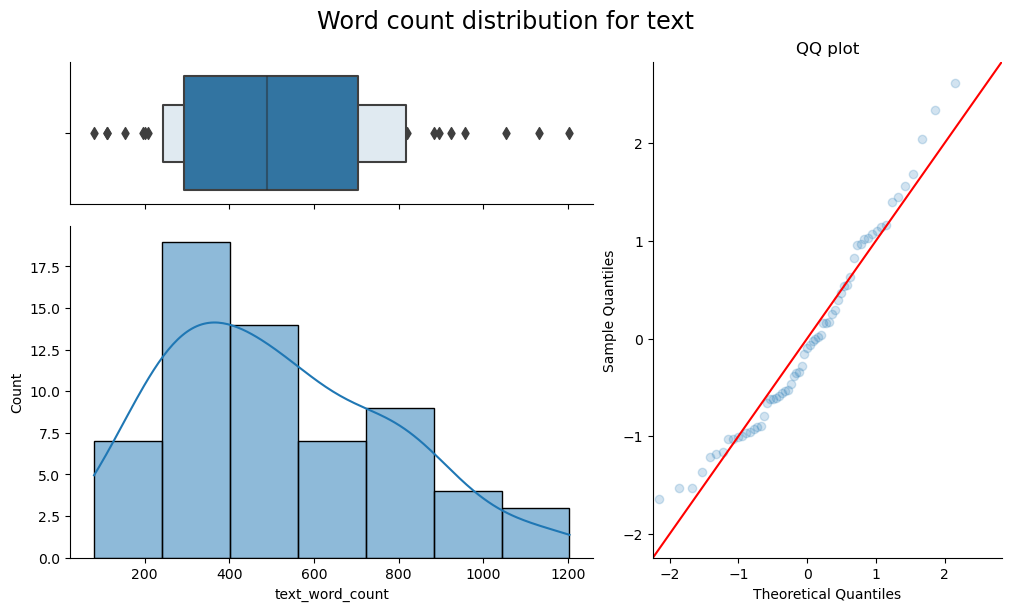

In [14]:
kde_boxen_qq(df, 'text_word_count', 'Word count distribution for text')

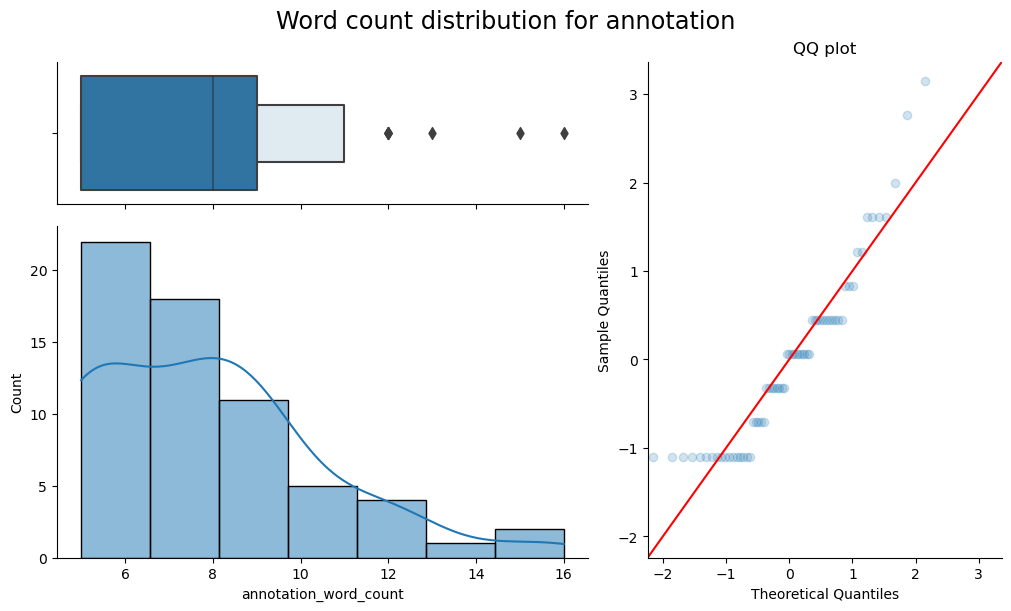

In [15]:
kde_boxen_qq(df, 'annotation_word_count', 'Word count distribution for annotation')

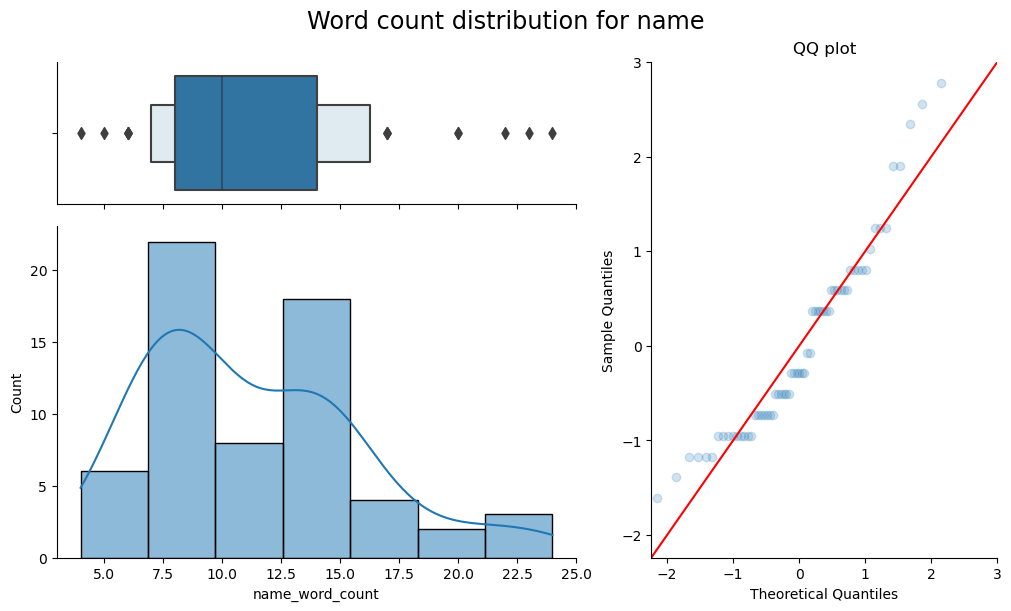

In [16]:
kde_boxen_qq(df, 'name_word_count', 'Word count distribution for name')

In [17]:
df[['text_word_count', 'annotation_word_count', 'name_word_count']].describe()

,text_word_count,annotation_word_count,name_word_count
count,63.000000,63.000000,63.000000
mean,513.888889,7.841270,11.333333
std,266.009344,2.610193,4.589610
min,80.000000,5.000000,4.000000
25%,292.000000,5.000000,8.000000
50%,489.000000,8.000000,10.000000
75%,705.000000,9.000000,14.000000
max,1204.000000,16.000000,24.000000


In [18]:
df.text_word_count.quantile(0.9)

870.6000000000003

In [19]:
df.text_word_count.quantile(0.95)

953.8

In [20]:
df.text_word_count.quantile(0.99)

1158.7400000000002

**Word cloud just for fun**

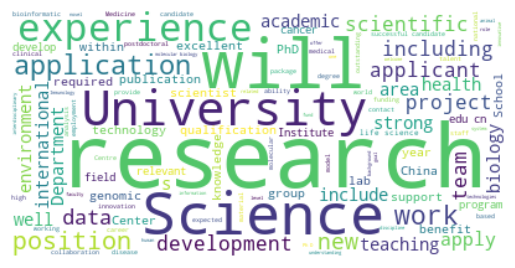

In [21]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(df['text']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()